In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('placement.csv')

In [19]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [13]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

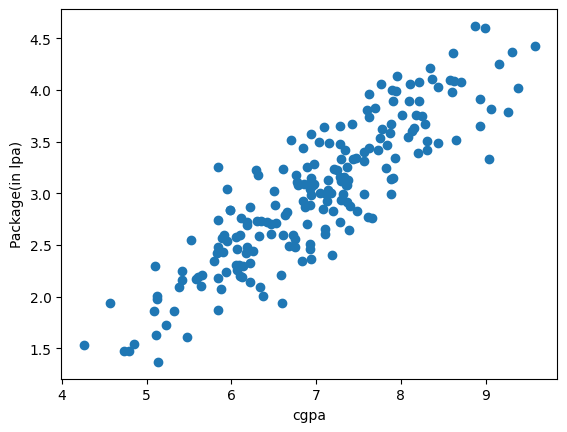

In [14]:
plt.scatter(
    df['cgpa'],df['package']
)
plt.xlabel('cgpa')
plt.ylabel('Package(in lpa)')

*we can see there is a sort of linear relation between cgpa column and output column*

In [20]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [21]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()




In [24]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

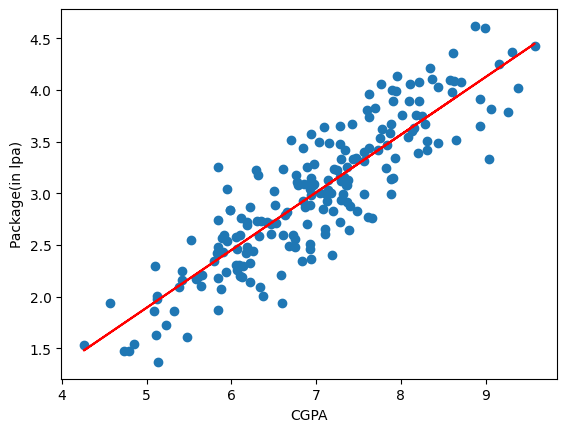

In [25]:
plt.scatter(
    df['cgpa'],df['package']
)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
y_pred = lr.predict(X_test)

In [28]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [31]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [32]:
4.1 - 3.89111601

0.20888398999999946

MAE :
1. not differentiable
2. when you have lots of outliers in the data use MAE
3. context dependent
4. unit of MAE = unit of output column

In [29]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


on an avg, error by 0.28 lpa

MSE :
1. differentiable
2. if your data has less outliers use this
3. context dependent
4. unit of MSE = (unit of ouput column)**2

In [33]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


avg error of 0.121 (lpa)**2

RMSE :
1. differentiable
2. if your data has less outliers use this
3. context dependent
4. unit of RMSE = unit of output column

In [34]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


avg error by 0.34 lpa

R2 Score :
1. Formula : 1 - (SSr/SSm)
SSr = Sum of squared error in regression line

SSm = Sum of squared error in mean line

2. In R2 score, you compare how much better is the linear regression line from the Ymean line

3. R2 score = 0 : when the mistake made by mean line becomes equal to the mistake made by regression line. which means no use of i/p data was made.

4. R2 score = 1 : when sum of squared error in regression line becomes 0, means the line perfectly passes through all the points

5. R2 score = -1 : When SSr > SSm, when regression line is completely away from data (worst than mean line) -> when you apply linear regression on highly non-linear data

6. The more you move towards perfection, r2 score moves towards 1 (perfect line)

7. The more you move towards imperfection (moving towards mean line) r2 score moves towards 0

Ymean line -> it is when you have no input data and you tell the avg package just based on the mean of Y

In [35]:
print("R2 Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.780730147510384


Interpretation : Input column(cgpa) is able to explain 80% of the variance in output column(lpa) , the rest 20% are stochastic factors(reasons that cant be mathematically formualed)

r2 score -> more the number of input columns, more variance explained of o/p column

but sometimes there are irrelevant columns that do not contribute to the output, but r2 score still slightly increases or stays the same, but it should decrease, so we have adjusted r2 score.

Adjusted R2 score :
1. When irrelevant input columns are added(that has no effect on output) , adjusted R2 score decreases.
2. When relevant input columns are added (that has effect on output), adjusted R2 score increases
3. Mainly used in multiple linear regression, where there are many input columns
4. Formula : 1 - [((1-r2_score)(n-1))/(n-1-k)]

where n = no of rows, k = total number of input columns

In [36]:
X_test.shape

(40, 1)

In [37]:
1 - ((1-r2)*(40-1))/(40-1-1)

0.7749598882343415

In [38]:
df.shape

(200, 2)

*Adding irrelevant column*

In [39]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

In [41]:
new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.907244,3.26
1,5.12,0.673300,1.98
2,7.82,0.370469,3.25
3,7.42,0.860015,3.67
4,6.94,0.543265,3.57


Text(0, 0.5, 'Package(in lpa)')

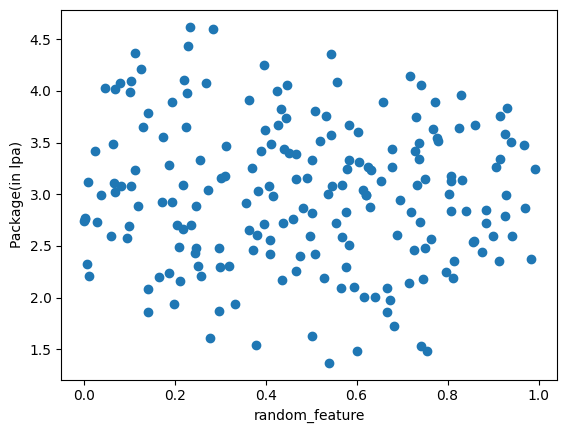

In [42]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [43]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]


In [44]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.779558105131037


In [46]:
1 - ((1-r2)*(40-1))/(40-1-2)

0.7676423270300119

as expected, adjusted R2 score decreased from 0.7749 to 0.7676 on adding irrelevant column, which is correct.

*Adding relevant column*

In [49]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [50]:
new_df2.sample(5)

,cgpa,iq,package
183,7.28,2.82,2.72
37,5.90,3.23,2.43
12,8.94,4.45,3.65
47,5.84,2.06,3.26
8,6.09,2.11,2.31


Text(0, 0.5, 'Package(in lpa)')

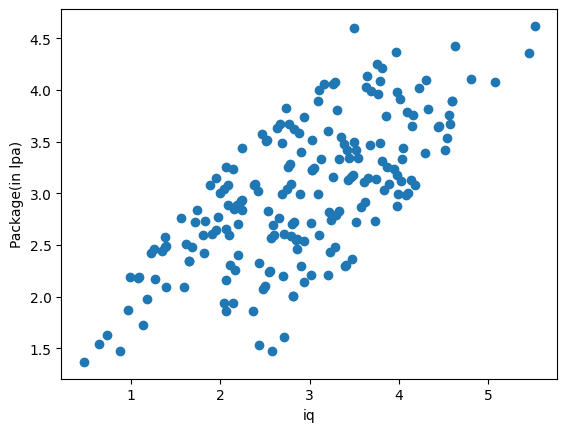

In [51]:
plt.scatter(new_df2['iq'],new_df2['package'])
# there is a sort of linear relation
# between iq column and package,
# so iq affects package
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [52]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7874829334617042


R2 score increased from 0.7807 to 0.7874 on adding relevant column

In [56]:
1 - (((1-r2)*(40-1))/(40-1-2))

0.7759955244596342

Adjusted r2 score increased from 0.7749 to 0.7759 on adding relevant column